# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#funcao
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


## Primeiro caso de teste

In [253]:
#população inicial (primeira geração)
n_pop = 10
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.57671421, 0.35274835, 0.75537636],
       [0.28566264, 0.96669548, 0.58170516],
       [0.8166381 , 0.65251801, 0.65799721],
       [0.13585852, 0.13896163, 0.29460139],
       [0.74640922, 0.29882899, 0.03212698],
       [0.53496257, 0.71720641, 0.86793711],
       [0.24653395, 0.73039864, 0.58211643],
       [0.11543162, 0.05577222, 0.55040142],
       [0.04870449, 0.85367061, 0.82875874],
       [0.67593723, 0.6897626 , 0.19453687]])

In [254]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ 0.46028525,  0.11649011,  4.53225817],
       [-1.28602413,  3.80017288,  3.49023095],
       [ 1.89982859,  1.91510805,  3.94798328],
       [-2.18484889, -1.16623022,  1.76760832],
       [ 1.47845532, -0.20702605,  0.19276188],
       [ 0.20977545,  2.30323845,  5.20762266],
       [-1.52079632,  2.38239182,  3.49269859],
       [-2.3074103 , -1.66536665,  3.30240855],
       [-2.70777308,  3.12202365,  4.97255246],
       [ 1.05562335,  2.1385756 ,  1.16722124]])

In [255]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[ 4.60285247e-01,  1.16490114e-01,  4.53225817e+00,
         1.44299563e+02],
       [-1.28602413e+00,  3.80017288e+00,  3.49023095e+00,
         1.24281302e+02],
       [ 1.89982859e+00,  1.91510805e+00,  3.94798328e+00,
         3.52012170e+01],
       [-2.18484889e+00, -1.16623022e+00,  1.76760832e+00,
         3.47496578e+02],
       [ 1.47845532e+00, -2.07026049e-01,  1.92761880e-01,
         3.36126050e+02],
       [ 2.09775446e-01,  2.30323845e+00,  5.20762266e+00,
         1.54291554e+02],
       [-1.52079632e+00,  2.38239182e+00,  3.49269859e+00,
         7.37511678e+01],
       [-2.30741030e+00, -1.66536665e+00,  3.30240855e+00,
         3.80831411e+02],
       [-2.70777308e+00,  3.12202365e+00,  4.97255246e+00,
         2.79383450e+02],
       [ 1.05562335e+00,  2.13857560e+00,  1.16722124e+00,
         1.01187343e+02]])

In [256]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 1.89982859e+00,  1.91510805e+00,  3.94798328e+00,
         3.52012170e+01],
       [-1.52079632e+00,  2.38239182e+00,  3.49269859e+00,
         7.37511678e+01],
       [ 1.05562335e+00,  2.13857560e+00,  1.16722124e+00,
         1.01187343e+02],
       [-1.28602413e+00,  3.80017288e+00,  3.49023095e+00,
         1.24281302e+02],
       [ 4.60285247e-01,  1.16490114e-01,  4.53225817e+00,
         1.44299563e+02],
       [ 2.09775446e-01,  2.30323845e+00,  5.20762266e+00,
         1.54291554e+02],
       [-2.70777308e+00,  3.12202365e+00,  4.97255246e+00,
         2.79383450e+02],
       [ 1.47845532e+00, -2.07026049e-01,  1.92761880e-01,
         3.36126050e+02],
       [-2.18484889e+00, -1.16623022e+00,  1.76760832e+00,
         3.47496578e+02],
       [-2.30741030e+00, -1.66536665e+00,  3.30240855e+00,
         3.80831411e+02]])

In [257]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 1.89982859e+00,  1.91510805e+00,  3.94798328e+00,
         3.52012170e+01],
       [-1.52079632e+00,  2.38239182e+00,  3.49269859e+00,
         7.37511678e+01],
       [ 1.05562335e+00,  2.13857560e+00,  1.16722124e+00,
         1.01187343e+02],
       [-1.28602413e+00,  3.80017288e+00,  3.49023095e+00,
         1.24281302e+02],
       [ 4.60285247e-01,  1.16490114e-01,  4.53225817e+00,
         1.44299563e+02]])

In [258]:
#contagem de população estagnada
cont = 0
delta = 0.01

Número de iterações para a convergência:  99


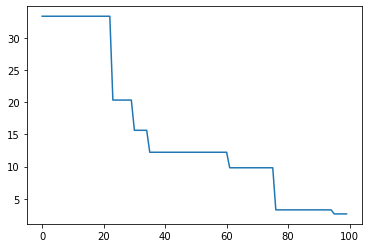

In [260]:
melhor_i=[]
sem_evoluir = 100
i_desejadas = 5

#while i_desejadas > 0:
    
for i in range(sem_evoluir):
    #segunda geracao
    if i==0:
        nova_melhor_pop = melhor_pop_inicial.copy()

        #novos 50% da população
        nova_pop = criaPop(int(n_pop/2),dim)

        #converter para as faixas
        nova_pop = converter1(nova_pop)

        #fitness da nova população
        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        #melhor 50% pop anterior + 50% nova população
        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        #reordena
        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

        #melhor fit dessa geração
        melhor_i.append(melhor_pop[0:1,-1])

    #gerações posteriores
    elif i>0:
        nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

        nova_pop = criaPop(int(n_pop/2),dim)

        nova_pop = converter1(nova_pop)

        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

        #melhores fits da geração
        melhor_i.append(melhor_pop[0:1,-1])

        evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

        if evolucao <= delta:
            cont += 1

        elif evolucao >= delta:
            cont=0

        elif evolucao == cont:
            break

print('Número de iterações para a convergência: ',i)

#i_desejadas -= 1

#media e desvio padrao dos fits
media = sum(melhor_i)/len(melhor_i)
desvioP = np.std(melhor_i,axis=0)
melhor_i = np.array(melhor_i)
plt.plot(melhor_i)
#melhor_i.shape

[Início](#Índice)

## Segundo caso de teste

In [245]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [246]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [247]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [248]:
#palavra aleatoria
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([123.14204659, 124.66372597, 112.70818473,  75.87812399,
         93.13742765, 116.42585792,  58.04078175,  97.310226  ,
         57.58014596,  73.02834668,  82.96968783,  66.37227796,
        103.18725135,  95.39916421,  67.93183428, 111.96823018,
         81.92653361,  67.05302893,  78.284241  , 120.80087755,
         91.18095435,  69.82770794,  84.53435777,  77.32086001,
        124.20021176,  75.29500427,  76.09101225,  79.94494185,
         77.81881445,  92.77317543])]

In [249]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[ 123.14204659, 4983.6606033 ],
       [ 124.66372597, 5200.82216519],
       [ 112.70818473, 3619.36814848],
       [  75.87812399,  544.34134685],
       [  93.13742765, 1647.58281705],
       [ 116.42585792, 4080.50848903],
       [  58.04078175,   30.18163789],
       [  97.310226  , 2003.74640158],
       [  57.58014596,   25.3325583 ],
       [  73.02834668,  419.48556164],
       [  82.96968783,  925.53993478],
       [  66.37227796,  191.13831064],
       [ 103.18725135, 2564.43505682],
       [  95.39916421, 1836.30797786],
       [  67.93183428,  236.69312571],
       [ 111.96823018, 3530.88259602],
       [  81.92653361,  863.15699507],
       [  67.05302893,  210.42487521],
       [  78.284241  ,  662.40557425],
       [ 120.80087755, 4658.59180021],
       [  91.18095435, 1492.58242841],
       [  69.82770794,  298.6228669 ],
       [  84.53435777, 1023.19105693],
       [  77.32086001,  613.74413999],
       [ 124.20021176, 5134.18275494],
       [  75.29500427,  5

In [250]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra

array([[ 57.58014596,  25.3325583 ],
       [ 58.04078175,  30.18163789],
       [ 66.37227796, 191.13831064],
       [ 67.05302893, 210.42487521],
       [ 67.93183428, 236.69312571],
       [ 69.82770794, 298.6228669 ],
       [ 73.02834668, 419.48556164],
       [ 75.29500427, 517.47169824],
       [ 75.87812399, 544.34134685],
       [ 76.09101225, 554.32051268],
       [ 77.32086001, 613.74413999],
       [ 77.81881445, 638.66460551],
       [ 78.284241  , 662.40557425],
       [ 79.94494185, 750.64721771],
       [ 81.92653361, 863.15699507]])

In [ ]:
#contagem de geração estagnada
cont_2 = 0
delta_2 = 0.01

[Início](#Índice)<br>

## Terceiro caso de teste

In [252]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)